In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as td
from tensorflow import keras

from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
data_dir = 'caltech-101-img'

In [42]:
data_gen = ImageDataGenerator(
    rescale = 1.0/255
)

In [43]:
data_generator = data_gen.flow_from_directory(
    data_dir,
    batch_size = 200,
    target_size = (64,64),
    class_mode = 'categorical'
)

Found 9144 images belonging to 102 classes.


In [44]:
x_train,y_train = data_generator[0]

In [45]:
x_test,y_test = data_generator[1]

In [46]:
weights_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [47]:
base_model = VGG16(
    weights = weights_path,
    include_top = False,
    input_shape = (64,64,3)
)

In [48]:
for layer in base_model.layers :
    layer.trainable = False

In [49]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [50]:
x = Flatten()(base_model.output)

In [51]:
x = Dense(512 , activation = 'relu')(x)
x = td.keras.layers.Dropout(0.3)(x)

In [52]:
predictions = Dense(102,activation = 'softmax')(x)

In [53]:
model = Model(inputs = base_model.inputs,outputs = predictions)

In [54]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [55]:
history = model.fit(x_train,y_train,epochs = 20,batch_size = 64,validation_data = (x_test,y_test))

Epoch 1/20


C:\Users\rutur\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_33']. Received: the structure of inputs=*
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.0745 - loss: 4.5806 - val_accuracy: 0.0900 - val_loss: 4.3880
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1115 - loss: 4.3262 - val_accuracy: 0.1100 - val_loss: 4.2370
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1518 - loss: 3.9639 - val_accuracy: 0.1500 - val_loss: 4.0832
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1714 - loss: 3.8351 - val_accuracy: 0.1500 - val_loss: 4.4735
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2031 - loss: 3.5652 - val_accuracy: 0.2500 - val_loss: 3.8204
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2660 - loss: 3.2633 - val_accuracy: 0.2600 - val_loss: 3.7501
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3031 - loss: 3.0247 - val_accuracy: 0.2900 - val_loss: 3.7359
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3559 - loss: 2.9833 - val_accuracy: 0.2900 - val_loss: 3.9150
Epoch 9/20
4/4 ━━━━━━━━━━━━

In [56]:
loss,accuracy = model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - accuracy: 0.3993 - loss: 4.3142


In [57]:
accuracy

0.3700000047683716

In [58]:
loss

4.5310959815979

In [59]:
labels = list(data_generator.class_indices.keys())

In [60]:
labels

['BACKGROUND_Google',
 'Faces',
 'Faces_easy',
 'Leopards',
 'Motorbikes',
 'accordion',
 'airplanes',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooste

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step


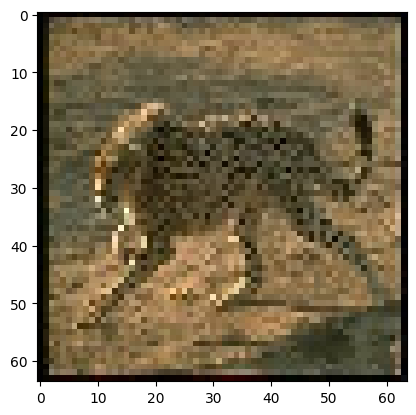

In [66]:
plt.imshow(x_test[130])
y_predict = model.predict(x_test)

In [67]:
print("predicted " , labels[np.argmax(y_predict[130])])

predicted  Leopards


In [68]:
print("actual" , labels[np.argmax(y_test[130])])

actual Leopards
